In [61]:
from pre_processing import pre_processing, pre_processing_aggregated, add_labels, train_test_split
import pandas as pd

import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn

In [108]:
agg_df = add_labels(pre_processing_aggregated())

agg_df.head(5)

,transcript_id,position,reference_position,kmer_sequence,original_kmer_sequence,num_observations,dwelling_length,sd_signal,mean_signal,gene_id,label
0,ENST00000000233,243,244,AAGAC,AGACC,185,0.008264,4.223784,123.702703,ENSG00000004059,0
1,ENST00000000233,244,244,AGACC,AGACC,185,0.009373,7.382162,125.913514,ENSG00000004059,0
2,ENST00000000233,245,244,GACCA,AGACC,185,0.007345,4.386989,80.570270,ENSG00000004059,0
3,ENST00000000233,260,261,CAAAC,AAACT,172,0.006609,3.216424,109.681395,ENSG00000004059,0
4,ENST00000000233,261,261,AAACT,AAACT,172,0.006813,3.226535,107.889535,ENSG00000004059,0


In [10]:
agg_df["label"].value_counts()

label
0    349089
1     16425
Name: count, dtype: int64

In [46]:
agg_df.dtypes

transcript_id              object
position                    int64
reference_position          int64
kmer_sequence              object
original_kmer_sequence     object
num_observations            int64
dwelling_length           float64
sd_signal                 float64
mean_signal               float64
gene_id                    object
label                       int64
dtype: object

In [47]:
train, test = train_test_split(agg_df, 4266, 0.2)

In [48]:
print(train.shape)
print(test.shape)

(291654, 11)
(73860, 11)


In [49]:
X_train = train[["dwelling_length","sd_signal","mean_signal"]]
y_train = train["label"]

X_test = test[["dwelling_length","sd_signal","mean_signal"]]
y_test = test["label"]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(291654, 3)
(291654,)
(73860, 3)
(73860,)


In [65]:
def logisitc_model(X_train, y_train, X_test, y_test):

    model = LogisticRegression()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = (10,7))
    sn.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Prediction')
    plt.ylabel('Truth')

c:\Users\jonas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jonas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jonas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98     70554
           1       0.00      0.00      0.00      3306

    accuracy                           0.96     73860
   macro avg       0.48      0.50      0.49     73860
weighted avg       0.91      0.96      0.93     73860



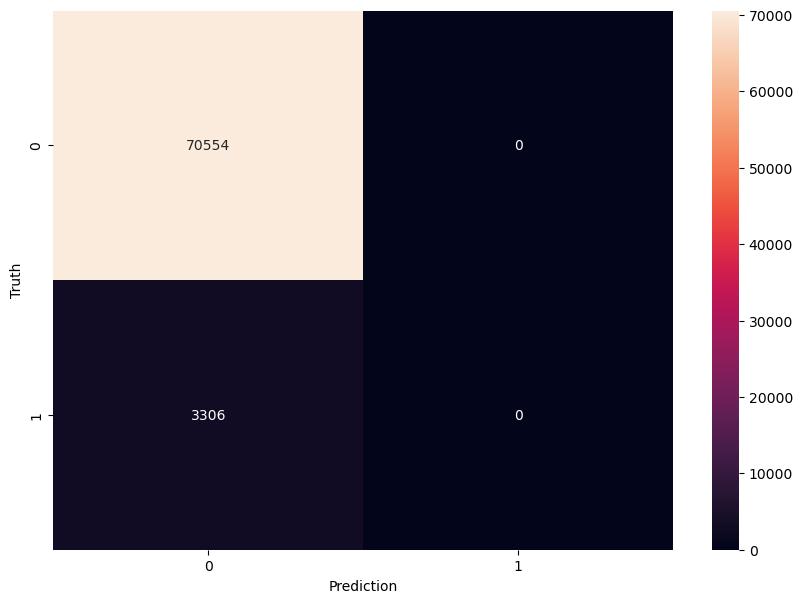

In [66]:
logisitc_model(X_train, y_train, X_test, y_test)


c:\Users\jonas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jonas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jonas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98     70554
           1       0.00      0.00      0.00      3306

    accuracy                           0.96     73860
   macro avg       0.48      0.50      0.49     73860
weighted avg       0.91      0.96      0.93     73860



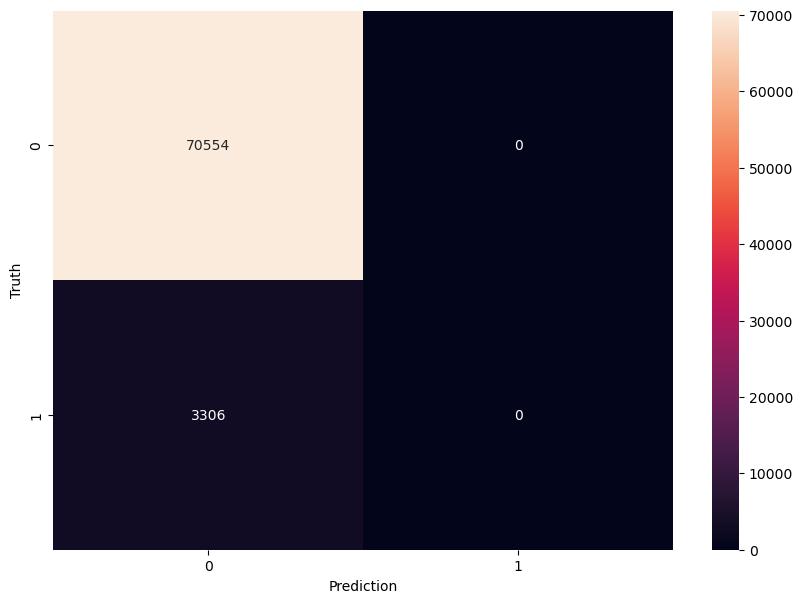

In [96]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

logisitc_model(X_train_scaled, y_train, X_test_scaled, y_test)

In [87]:
emb_df = agg_df

emb_df['transcript_id'] = pd.factorize(emb_df['transcript_id'])[0]
emb_df['kmer_sequence'] = pd.factorize(emb_df['kmer_sequence'])[0]
emb_df['original_kmer_sequence'] = pd.factorize(emb_df['original_kmer_sequence'])[0]
emb_df['gene_id'] = pd.factorize(emb_df['gene_id'])[0]


In [93]:
emb_train, emb_test = train_test_split(emb_df, 4266, 0.2)

emb_X_train = emb_train.drop(columns=["label"])
emb_y_train = emb_train["label"]

emb_X_test = emb_test.drop(columns=["label"])
emb_y_test = emb_test["label"]

print(emb_X_train.shape)
print(emb_y_train.shape)
print(emb_X_test.shape)
print(emb_y_test.shape)

(289983, 10)
(289983,)
(75531, 10)
(75531,)


c:\Users\jonas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jonas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jonas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     72363
           1       0.00      0.00      0.00      3168

    accuracy                           0.96     75531
   macro avg       0.48      0.50      0.49     75531
weighted avg       0.92      0.96      0.94     75531



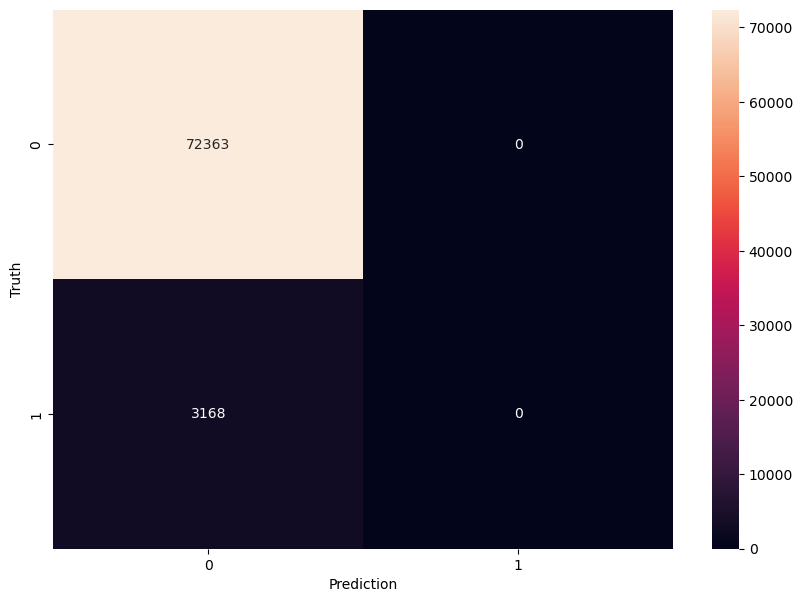

In [94]:
logisitc_model(emb_X_train, emb_y_train, emb_X_test, emb_y_test)


In [98]:
df_majority = emb_train[emb_train.label==0]
df_minority = emb_train[emb_train.label==1]

df_majority.shape,df_minority.shape

((276726, 11), (13257, 11))

In [99]:
from sklearn.utils import resample

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=276726,    # to match majority class
                                 random_state=4266) 

In [102]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled["label"].value_counts()

label
0    276726
1    276726
Name: count, dtype: int64

In [103]:
upsampled_X_train = df_upsampled.drop(columns=["label"])
upsampled_y_train = df_upsampled["label"]

print(upsampled_X_train.shape)
print(upsampled_y_train.shape)

(553452, 10)
(553452, 10)


c:\Users\jonas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.96      0.48      0.64     72363
           1       0.05      0.60      0.09      3168

    accuracy                           0.48     75531
   macro avg       0.51      0.54      0.36     75531
weighted avg       0.93      0.48      0.62     75531



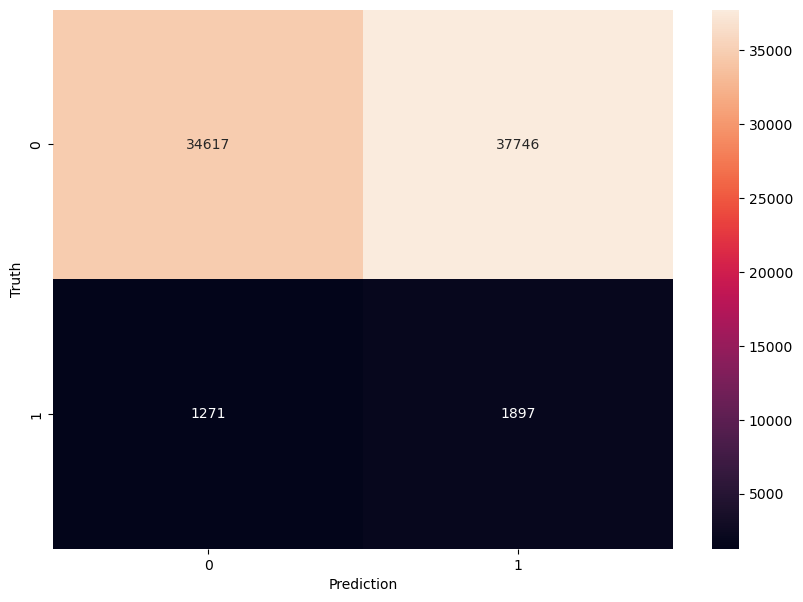

In [104]:
logisitc_model(upsampled_X_train, upsampled_y_train, emb_X_test, emb_y_test)

In [105]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
smote_X_train, smote_y_train = sm.fit_resample(emb_X_train, emb_y_train.ravel())

smote_X_train.shape, smote_y_train.shape

((553452, 10), (553452,))

c:\Users\jonas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.96      0.49      0.65     72363
           1       0.05      0.58      0.09      3168

    accuracy                           0.49     75531
   macro avg       0.51      0.54      0.37     75531
weighted avg       0.93      0.49      0.62     75531



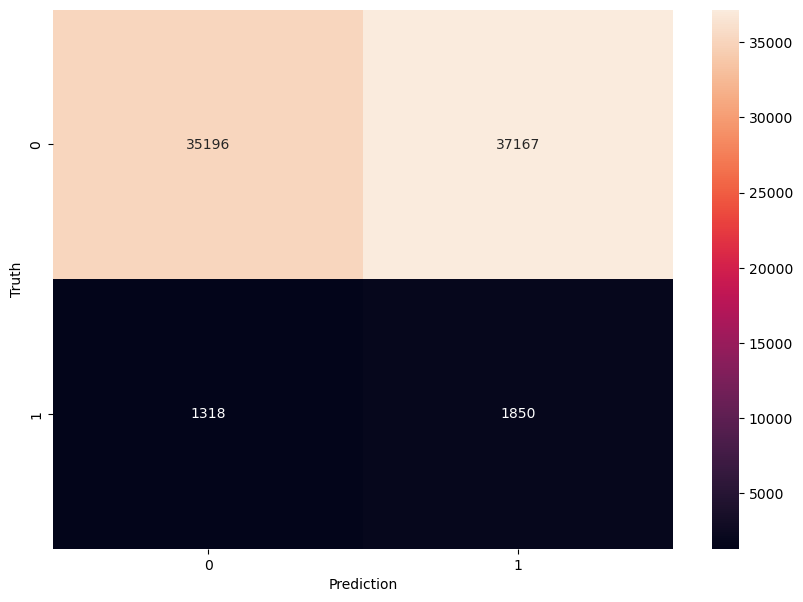

In [106]:
logisitc_model(smote_X_train, smote_y_train, emb_X_test, emb_y_test)